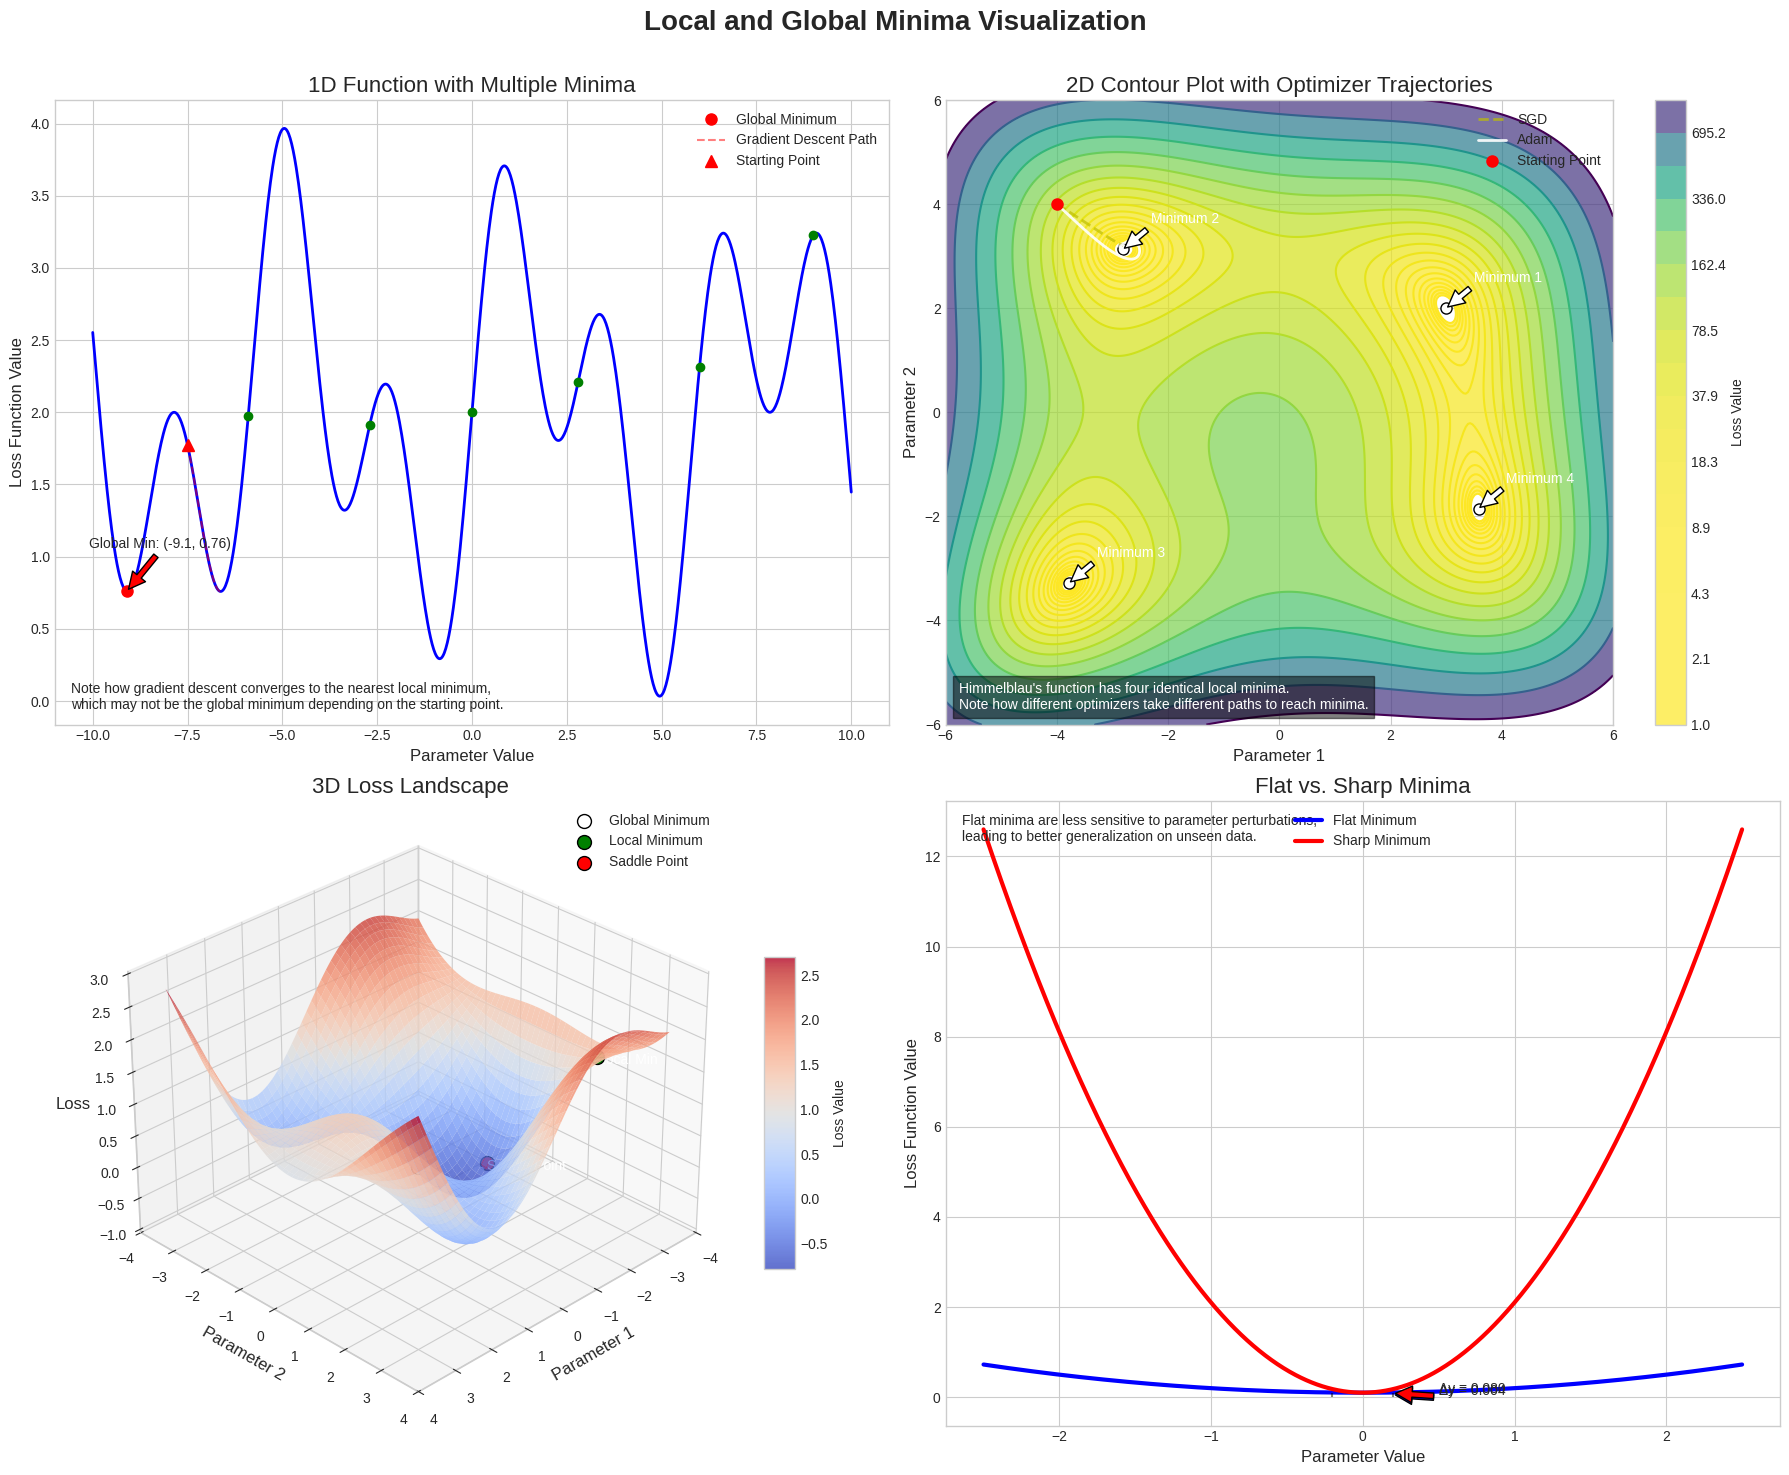

Visualization complete! Output files: 'minima_visualization.png' and 'rotating_loss_landscape.gif'


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Set the style for better-looking plots
plt.style.use('seaborn-v0_8-whitegrid')

# Create a figure with multiple subplots
fig = plt.figure(figsize=(18, 15))
fig.suptitle('Local and Global Minima Visualization', fontsize=20, fontweight='bold', y=0.98)

# Define a 1D function with multiple local minima
def function_1d(x):
    return np.sin(x) + np.sin(2.2 * x) + 2

# 1D visualization - Function with multiple local minima
def plot_1d_function():
    ax1 = fig.add_subplot(221)
    x = np.linspace(-10, 10, 1000)
    y = function_1d(x)

    # Plot the function
    ax1.plot(x, y, 'b-', linewidth=2)
    ax1.set_title('1D Function with Multiple Minima', fontsize=16)
    ax1.set_xlabel('Parameter Value', fontsize=12)
    ax1.set_ylabel('Loss Function Value', fontsize=12)

    # Mark the local minima
    local_minima_x = [-9.1, -5.9, -2.7, 0.0, 2.8, 6.0, 9.0]
    local_minima_y = [function_1d(x_val) for x_val in local_minima_x]
    global_min_index = np.argmin(local_minima_y)

    # Plot local minima in green and global minimum in red
    for i, (x_val, y_val) in enumerate(zip(local_minima_x, local_minima_y)):
        if i == global_min_index:
            ax1.plot(x_val, y_val, 'ro', markersize=8, label='Global Minimum')
            ax1.annotate(f'Global Min: ({x_val:.1f}, {y_val:.2f})',
                         xy=(x_val, y_val), xytext=(x_val-1, y_val+0.3),
                         arrowprops=dict(facecolor='red', shrink=0.05))
        else:
            ax1.plot(x_val, y_val, 'go', markersize=6)
            if i == 0:  # Add label for the first point only
                ax1.plot(x_val, y_val, 'go', markersize=6, label='Local Minima')

    # Add an example of optimization trajectory
    start_x = -7.5
    trajectory_x = [start_x]
    trajectory_y = [function_1d(start_x)]

    learning_rate = 0.1
    for _ in range(100):
        # Numerical gradient calculation
        eps = 1e-7
        grad = (function_1d(trajectory_x[-1] + eps) - function_1d(trajectory_x[-1])) / eps
        # Update
        new_x = trajectory_x[-1] - learning_rate * grad
        trajectory_x.append(new_x)
        trajectory_y.append(function_1d(new_x))

    ax1.plot(trajectory_x, trajectory_y, 'r--', alpha=0.5, linewidth=1.5, label='Gradient Descent Path')
    ax1.plot(trajectory_x[0], trajectory_y[0], 'r^', markersize=8, label='Starting Point')

    ax1.legend(loc='upper right', fontsize=10)

    # Add explanation text
    ax1.text(0.02, 0.02,
             "Note how gradient descent converges to the nearest local minimum,\n"
             "which may not be the global minimum depending on the starting point.",
             transform=ax1.transAxes, fontsize=10, verticalalignment='bottom')

# 2D contour plot visualization with optimizer trajectories
def plot_2d_contour():
    ax2 = fig.add_subplot(222)

    # Define the 2D Himmelblau function
    def himmelblau(x, y):
        return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

    # Create a grid of x, y points
    x = np.linspace(-6, 6, 300)
    y = np.linspace(-6, 6, 300)
    X, Y = np.meshgrid(x, y)
    Z = himmelblau(X, Y)

    # Create the contour plot
    levels = np.logspace(0, 3, 20)
    contour = ax2.contour(X, Y, Z, levels=levels, cmap='viridis_r')
    contourf = ax2.contourf(X, Y, Z, levels=levels, cmap='viridis_r', alpha=0.7)
    plt.colorbar(contourf, ax=ax2, label='Loss Value')

    # Mark the minima
    minima = [
        (3.0, 2.0),
        (-2.81, 3.13),
        (-3.78, -3.28),
        (3.58, -1.85)
    ]

    for i, (x_min, y_min) in enumerate(minima):
        ax2.plot(x_min, y_min, 'wo', markersize=8, markeredgecolor='black')
        ax2.annotate(f'Minimum {i+1}', xy=(x_min, y_min), xytext=(x_min+0.5, y_min+0.5),
                    fontsize=10, color='white',
                    arrowprops=dict(facecolor='white', shrink=0.05))

    # Add SGD trajectory
    def sgd_trajectory(start_x, start_y, learning_rate=0.001, iterations=100):
        x, y = start_x, start_y
        path_x, path_y = [x], [y]

        for _ in range(iterations):
            # Compute gradient of Himmelblau's function
            dx = 4*x**3 + 4*x*y - 44*x + 2*x + 2*y**2 - 14
            dy = 2*x**2 + 4*y**3 + 4*x*y - 22 - 28*y

            # Update with SGD
            x = x - learning_rate * dx
            y = y - learning_rate * dy

            path_x.append(x)
            path_y.append(y)

        return path_x, path_y

    # Add Adam trajectory
    def adam_trajectory(start_x, start_y, learning_rate=0.1, iterations=50):
        x, y = start_x, start_y
        path_x, path_y = [x], [y]

        # Adam parameters
        beta1, beta2 = 0.9, 0.999
        epsilon = 1e-8
        m_x, m_y = 0, 0
        v_x, v_y = 0, 0

        for t in range(1, iterations + 1):
            # Compute gradient
            dx = 4*x**3 + 4*x*y - 44*x + 2*x + 2*y**2 - 14
            dy = 2*x**2 + 4*y**3 + 4*x*y - 22 - 28*y

            # Update biased first moment estimate
            m_x = beta1 * m_x + (1 - beta1) * dx
            m_y = beta1 * m_y + (1 - beta1) * dy

            # Update biased second moment estimate
            v_x = beta2 * v_x + (1 - beta2) * dx**2
            v_y = beta2 * v_y + (1 - beta2) * dy**2

            # Compute bias-corrected first moment estimate
            m_x_corrected = m_x / (1 - beta1**t)
            m_y_corrected = m_y / (1 - beta1**t)

            # Compute bias-corrected second moment estimate
            v_x_corrected = v_x / (1 - beta2**t)
            v_y_corrected = v_y / (1 - beta2**t)

            # Update parameters
            x = x - learning_rate * m_x_corrected / (np.sqrt(v_x_corrected) + epsilon)
            y = y - learning_rate * m_y_corrected / (np.sqrt(v_y_corrected) + epsilon)

            path_x.append(x)
            path_y.append(y)

        return path_x, path_y

    # Specify starting points
    start_x, start_y = -4, 4

    # Plot SGD trajectory
    sgd_x, sgd_y = sgd_trajectory(start_x, start_y)
    ax2.plot(sgd_x, sgd_y, 'y--', linewidth=2, alpha=0.7, label='SGD')

    # Plot Adam trajectory
    adam_x, adam_y = adam_trajectory(start_x, start_y)
    ax2.plot(adam_x, adam_y, 'w-', linewidth=2, alpha=0.9, label='Adam')

    # Mark the starting point
    ax2.plot(start_x, start_y, 'ro', markersize=8, label='Starting Point')

    ax2.set_title('2D Contour Plot with Optimizer Trajectories', fontsize=16)
    ax2.set_xlabel('Parameter 1', fontsize=12)
    ax2.set_ylabel('Parameter 2', fontsize=12)
    ax2.legend(loc='upper right')

    # Add explanation text
    ax2.text(0.02, 0.02,
             "Himmelblau's function has four identical local minima.\n"
             "Note how different optimizers take different paths to reach minima.",
             transform=ax2.transAxes, fontsize=10, verticalalignment='bottom',
             color='white', bbox=dict(facecolor='black', alpha=0.5))

# 3D surface visualization
def plot_3d_surface():
    ax3 = fig.add_subplot(223, projection='3d')

    # Define a simple 2D function with multiple minima
    def custom_function(x, y):
        return np.sin(x) * np.cos(y) + 0.1 * x**2 + 0.1 * y**2

    # Create a mesh grid
    x = np.linspace(-3.5, 3.5, 100)
    y = np.linspace(-3.5, 3.5, 100)
    X, Y = np.meshgrid(x, y)
    Z = custom_function(X, Y)

    # Plot the surface
    surf = ax3.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.8,
                           linewidth=0, antialiased=True)

    # Add color bar
    plt.colorbar(surf, ax=ax3, shrink=0.5, aspect=10, label='Loss Value')

    # Mark special points
    global_min_x, global_min_y = 0, 0
    global_min_z = custom_function(global_min_x, global_min_y)

    local_min_x, local_min_y = -2.5, 2.5
    local_min_z = custom_function(local_min_x, local_min_y)

    saddle_x, saddle_y = -2.0, 0.0
    saddle_z = custom_function(saddle_x, saddle_y)

    # Plot points
    ax3.scatter([global_min_x], [global_min_y], [global_min_z], color='white', s=100,
               marker='o', edgecolor='black', label='Global Minimum')

    ax3.scatter([local_min_x], [local_min_y], [local_min_z], color='green', s=100,
               marker='o', edgecolor='black', label='Local Minimum')

    ax3.scatter([saddle_x], [saddle_y], [saddle_z], color='red', s=100,
               marker='o', edgecolor='black', label='Saddle Point')

    # Add labels for the points
    ax3.text(global_min_x+0.2, global_min_y+0.2, global_min_z, 'Global Min', color='white')
    ax3.text(local_min_x+0.2, local_min_y+0.2, local_min_z, 'Local Min', color='white')
    ax3.text(saddle_x+0.2, saddle_y+0.2, saddle_z, 'Saddle Point', color='white')

    ax3.set_title('3D Loss Landscape', fontsize=16)
    ax3.set_xlabel('Parameter 1', fontsize=12)
    ax3.set_ylabel('Parameter 2', fontsize=12)
    ax3.set_zlabel('Loss', fontsize=12)
    ax3.legend(loc='upper right')

    # Set the initial view
    ax3.view_init(elev=30, azim=45)

# Flat vs. Sharp Minima Visualization
def plot_flat_vs_sharp():
    ax4 = fig.add_subplot(224)

    # Define two functions - one with a flat minimum and one with a sharp minimum
    def flat_minimum(x):
        return 0.1 * x**2 + 0.1

    def sharp_minimum(x):
        return 2 * x**2 + 0.1

    x = np.linspace(-2.5, 2.5, 1000)
    y_flat = flat_minimum(x)
    y_sharp = sharp_minimum(x)

    # Plot the functions
    ax4.plot(x, y_flat, 'b-', linewidth=3, label='Flat Minimum')
    ax4.plot(x, y_sharp, 'r-', linewidth=3, label='Sharp Minimum')

    # Shade the area around flat minimum to show better generalization
    perturb = 0.2
    x_shade = np.linspace(-perturb, perturb, 100)
    y_flat_shade = flat_minimum(x_shade)
    y_sharp_shade = sharp_minimum(x_shade)

    ax4.fill_between(x_shade, [flat_minimum(0)]*len(x_shade), y_flat_shade,
                     color='blue', alpha=0.3)
    ax4.fill_between(x_shade, [sharp_minimum(0)]*len(x_shade), y_sharp_shade,
                     color='red', alpha=0.3)

    # Indicate parameter perturbation
    ax4.plot([-perturb, -perturb], [0, flat_minimum(-perturb)], 'k--', alpha=0.5)
    ax4.plot([perturb, perturb], [0, flat_minimum(perturb)], 'k--', alpha=0.5)

    # Annotate flat vs sharp differences
    y_diff_flat = flat_minimum(perturb) - flat_minimum(0)
    y_diff_sharp = sharp_minimum(perturb) - sharp_minimum(0)

    ax4.annotate(f'Δy = {y_diff_flat:.3f}', xy=(perturb, flat_minimum(perturb)/2),
                xytext=(perturb+0.3, flat_minimum(perturb)/2),
                arrowprops=dict(facecolor='blue', shrink=0.05))

    ax4.annotate(f'Δy = {y_diff_sharp:.3f}', xy=(perturb, sharp_minimum(perturb)/2),
                xytext=(perturb+0.3, sharp_minimum(perturb)/2),
                arrowprops=dict(facecolor='red', shrink=0.05))

    ax4.set_title('Flat vs. Sharp Minima', fontsize=16)
    ax4.set_xlabel('Parameter Value', fontsize=12)
    ax4.set_ylabel('Loss Function Value', fontsize=12)
    ax4.legend(loc='upper center')

    # Add explanation text
    ax4.text(0.02, 0.98,
             "Flat minima are less sensitive to parameter perturbations,\n"
             "leading to better generalization on unseen data.",
             transform=ax4.transAxes, fontsize=10, verticalalignment='top')

# Plot all visualizations
plot_1d_function()
plot_2d_contour()
plot_3d_surface()
plot_flat_vs_sharp()

# Adjust layout and save
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

# Create an animation of the 3D surface rotating
def create_rotating_animation():
    # Create a new figure for the animation
    fig_anim = plt.figure(figsize=(10, 8))
    ax_anim = fig_anim.add_subplot(111, projection='3d')

    # Define the function and create the surface
    def custom_function(x, y):
        return np.sin(x) * np.cos(y) + 0.1 * x**2 + 0.1 * y**2

    x = np.linspace(-3.5, 3.5, 100)
    y = np.linspace(-3.5, 3.5, 100)
    X, Y = np.meshgrid(x, y)
    Z = custom_function(X, Y)

    # Plot the surface
    surf = ax_anim.plot_surface(X, Y, Z, cmap=cm.coolwarm, alpha=0.8,
                               linewidth=0, antialiased=True)

    # Mark special points
    global_min_x, global_min_y = 0, 0
    global_min_z = custom_function(global_min_x, global_min_y)

    local_min_x, local_min_y = -2.5, 2.5
    local_min_z = custom_function(local_min_x, local_min_y)

    saddle_x, saddle_y = -2.0, 0.0
    saddle_z = custom_function(saddle_x, saddle_y)

    # Plot points
    ax_anim.scatter([global_min_x], [global_min_y], [global_min_z], color='white', s=100,
                   marker='o', edgecolor='black', label='Global Minimum')

    ax_anim.scatter([local_min_x], [local_min_y], [local_min_z], color='green', s=100,
                   marker='o', edgecolor='black', label='Local Minimum')

    ax_anim.scatter([saddle_x], [saddle_y], [saddle_z], color='red', s=100,
                   marker='o', edgecolor='black', label='Saddle Point')

    # Add labels
    ax_anim.set_title('3D Loss Landscape Animation', fontsize=16)
    ax_anim.set_xlabel('Parameter 1', fontsize=12)
    ax_anim.set_ylabel('Parameter 2', fontsize=12)
    ax_anim.set_zlabel('Loss', fontsize=12)
    ax_anim.legend(loc='upper right')

    # Animation update function
    def update(frame):
        ax_anim.view_init(elev=30, azim=frame)
        return [surf]

    # Create animation
    anim = FuncAnimation(fig_anim, update, frames=np.arange(0, 360, 2), blit=True)

    # Save animation
    anim.save('rotating_loss_landscape.gif', writer='pillow', fps=15, dpi=100)

    plt.close(fig_anim)

# Create the animation
create_rotating_animation()

print("Visualization complete! Output files: 'minima_visualization.png' and 'rotating_loss_landscape.gif'")